In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'package(in lpa)')

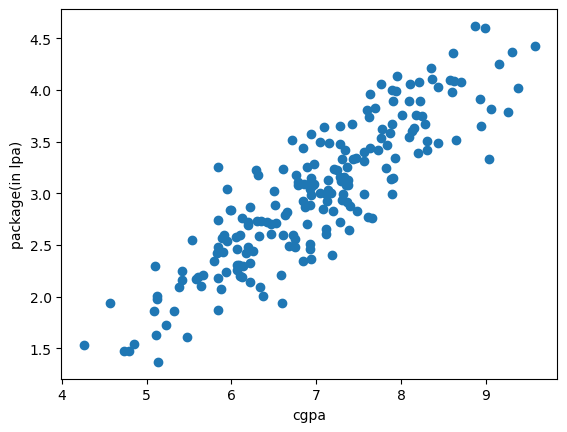

In [4]:
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('cgpa')
plt.ylabel('package(in lpa)')

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df[['cgpa']],df[['package']],test_size = 0.2, random_state=2)

In [6]:
x_train.head()

,cgpa
137,7.14
163,8.93
111,5.42
123,5.10
109,7.77


In [7]:
x_test.head()

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57


In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr= LinearRegression()

In [10]:
lr.fit(x_train,y_train)

LinearRegression()

In [11]:
y_pred = lr.predict(x_test)

In [12]:
r2_score(y_test,y_pred)

0.780730147510384

Text(0, 0.5, 'Package(in lpa)')

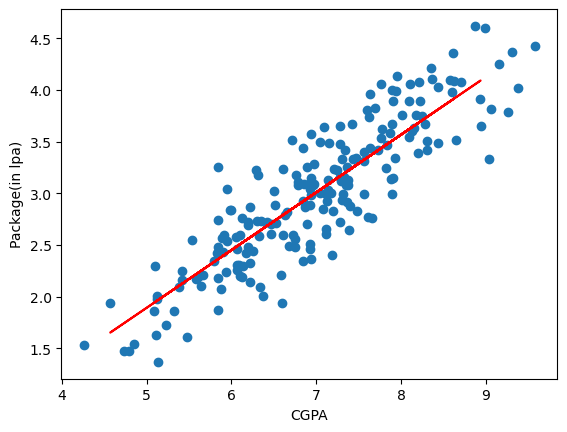

In [13]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_test,y_pred,color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [14]:
# y = mx+c
m = lr.coef_ 
c= lr.intercept_

In [15]:
print(m,c) 

[[0.55795197]] [-0.89611192]


In [16]:
poly = PolynomialFeatures(degree=2)

In [17]:
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)

In [18]:
print(x_train_trans)

[[ 1.      7.14   50.9796]
 [ 1.      8.93   79.7449]
 [ 1.      5.42   29.3764]
 [ 1.      5.1    26.01  ]
 [ 1.      7.77   60.3729]
 [ 1.      6.76   45.6976]
 [ 1.      6.89   47.4721]
 [ 1.      6.68   44.6224]
 [ 1.      7.91   62.5681]
 [ 1.      7.89   62.2521]
 [ 1.      8.71   75.8641]
 [ 1.      7.95   63.2025]
 [ 1.      6.61   43.6921]
 [ 1.      6.26   39.1876]
 [ 1.      6.53   42.6409]
 [ 1.      6.42   41.2164]
 [ 1.      5.11   26.1121]
 [ 1.      6.09   37.0881]
 [ 1.      6.93   48.0249]
 [ 1.      7.04   49.5616]
 [ 1.      5.94   35.2836]
 [ 1.      6.05   36.6025]
 [ 1.      5.83   33.9889]
 [ 1.      5.95   35.4025]
 [ 1.      9.31   86.6761]
 [ 1.      5.58   31.1364]
 [ 1.      7.88   62.0944]
 [ 1.      6.13   37.5769]
 [ 1.      7.76   60.2176]
 [ 1.      4.85   23.5225]
 [ 1.      6.19   38.3161]
 [ 1.      8.6    73.96  ]
 [ 1.      6.07   36.8449]
 [ 1.      7.18   51.5524]
 [ 1.      5.12   26.2144]
 [ 1.      7.39   54.6121]
 [ 1.      8.25   68.0625]
 

In [19]:
print(x_train)

     cgpa
137  7.14
163  8.93
111  5.42
123  5.10
109  7.77
..    ...
43   7.66
22   6.14
72   7.78
15   7.25
168  8.65

[160 rows x 1 columns]


In [20]:
#include bias parameter
lr = LinearRegression()

In [21]:
lr.fit(x_train_trans,y_train)

LinearRegression()

In [22]:
y_pred = lr.predict(x_test_trans)

In [23]:
y_pred

array([[3.86654106],
       [3.11727618],
       [2.37904398],
       [2.5833942 ],
       [1.54580378],
       [1.69082845],
       [2.03176673],
       [2.95473733],
       [3.75188968],
       [2.96040156],
       [4.04148591],
       [3.52107509],
       [2.9942978 ],
       [2.39727233],
       [3.21089731],
       [3.47914119],
       [1.88527732],
       [3.26539533],
       [2.99993231],
       [3.43164071],
       [2.56556074],
       [3.18897921],
       [2.88071587],
       [3.14493919],
       [3.68100212],
       [2.8921505 ],
       [3.50538172],
       [3.36242171],
       [3.89116803],
       [1.90451202],
       [3.65036697],
       [3.23274747],
       [3.73172102],
       [2.80597681],
       [2.80019792],
       [3.2924851 ],
       [3.53673024],
       [2.62485697],
       [2.67198822],
       [2.73052013]])

In [24]:
r2_score(y_test,y_pred)

0.7767655751491149

In [25]:
print(lr.coef_)

[[ 0.          0.85792534 -0.02123102]]


In [26]:
print(lr.intercept_)

[-1.93150738]


Text(0, 0.5, 'Package(in lpa)')

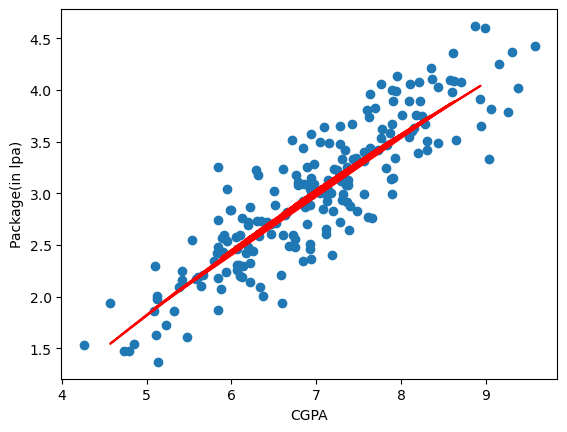

In [27]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_test,y_pred,color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [28]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_squared_error
r = Ridge(alpha = 0.0001)

In [29]:
r.fit(x_train,y_train)

Ridge(alpha=0.0001)

In [30]:
y_pred1 = r.predict(x_test) 

In [31]:
print("R2 score",r2_score(y_test,y_pred1)*100)
print("RSME",np.sqrt(mean_squared_error(y_test,y_pred1))*100)

R2 score 78.07300738846007
RSME 34.8270575647934


In [32]:
from sklearn.pipeline import Pipeline  
from sklearn.preprocessing import PolynomialFeatures

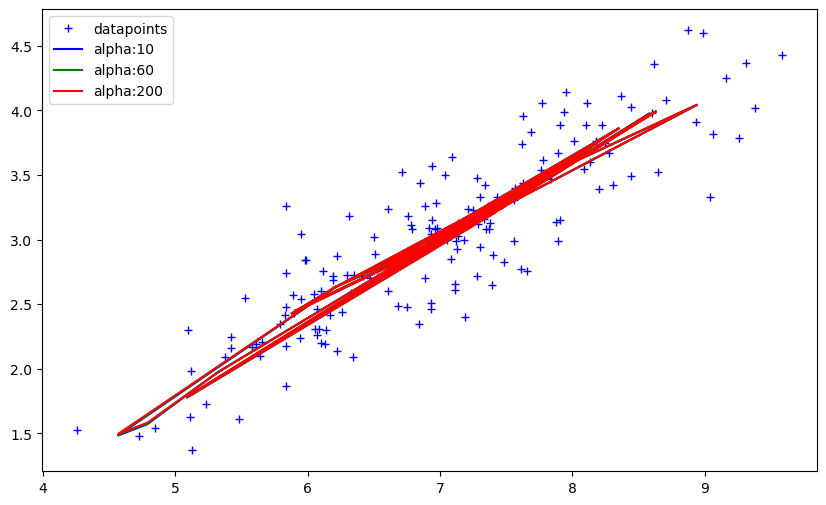

In [33]:
def get_preds_ridge(x_train,y_train,alpha):
    model = Pipeline([('poly_feets', PolynomialFeatures(degree = 16)),('ridge', Ridge(alpha = alpha))])
    model.fit(x_train, y_train)
    return model.predict(x_test)
alphas = [10,60,200]
cs = ['b','g','r']
plt.figure(figsize = (10,6))
plt.plot(x_train,y_train,'b+',label= 'datapoints')
for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x_train,y_train,alpha)
    plt.plot(x_test,preds,c,label='alpha:{}'.format(alpha))
plt.legend()
plt.show()

In [34]:
from sklearn.linear_model import Lasso

In [35]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

coefs = []
r2_scor = []
for i in [0, 0.6, 1]:
    reg = Lasso(alpha=i)
    reg.fit(x_train, y_train)
    
    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(x_test)
    r2_scor.append(r2_score(y_test, y_pred))

C:\Users\Surya Reddy\AppData\Local\Temp\ipykernel_3872\2606800659.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg.fit(x_train, y_train)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.276e+00, tolerance: 7.302e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


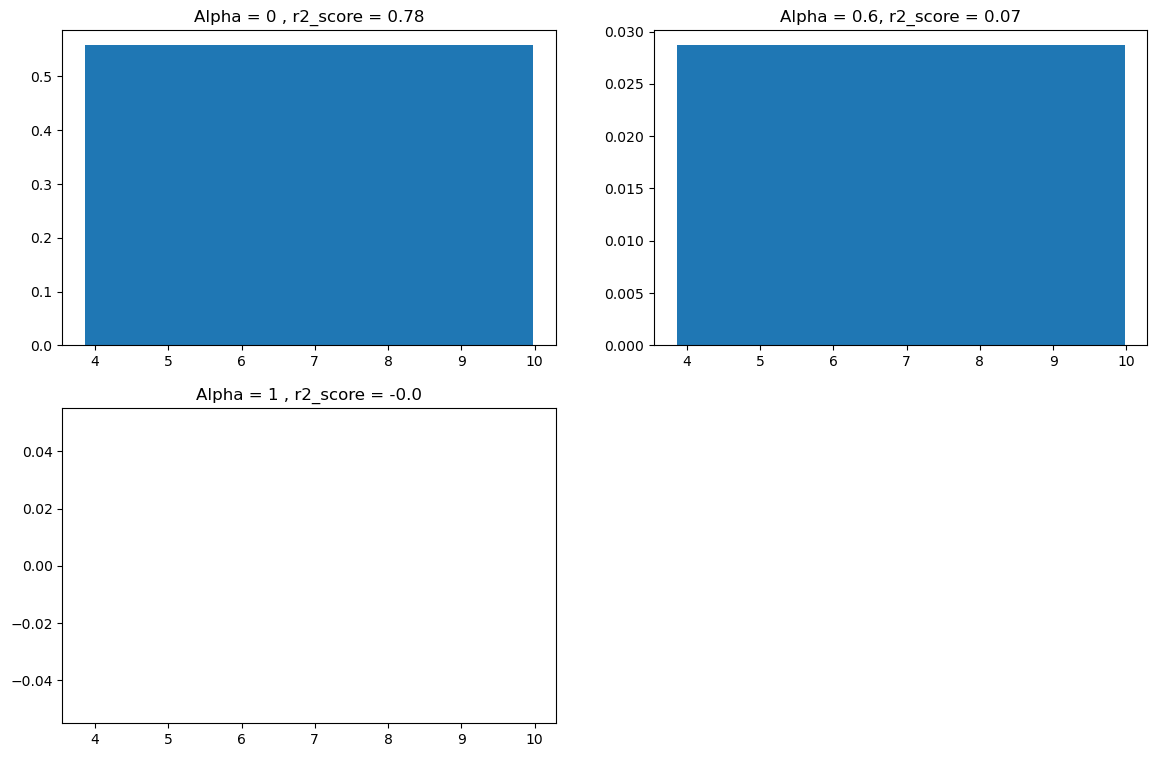

In [36]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(df['cgpa'],coefs[0])
plt.title('Alpha = 0 , r2_score = {}'.format(round(r2_scor[0],2)))

plt.subplot(222)
plt.bar(df['cgpa'],coefs[1])
plt.title('Alpha = 0.6, r2_score = {}'.format(round(r2_scor[1],2)))

plt.subplot(223)
plt.bar(df['cgpa'],coefs[2])
plt.title('Alpha = 1 , r2_score = {}'.format(round(r2_scor[2],2)))
plt.show()

In [53]:
alphas = [0,0.8,1,5,20,100,10000,100000]
coefs=[]

for i in alphas:
    reg = Ridge(alpha = i)
    reg.fit(x_train,y_train)
    coefs.append(reg.coef_.tolist())

In [54]:
arr = np.array(coefs)

In [59]:
arr1= arr.reshape(-1)
arr_reshaped = arr.squeeze()


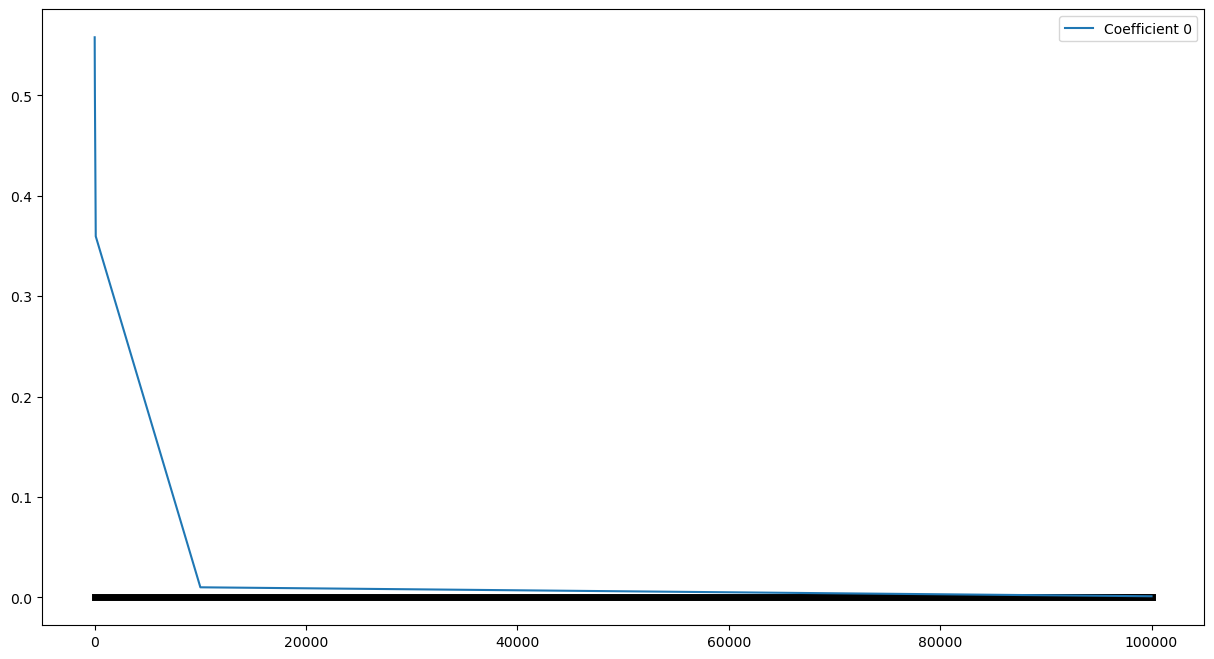

In [60]:
plt.figure(figsize=(15, 8))
plt.plot(alphas, np.zeros(len(alphas)), color='black', linewidth=5)
for i in range(arr.shape[1]):  # Iterate over columns of arr (different coefficients)
    plt.plot(alphas, arr[:, i], label=f'Coefficient {i}')
plt.legend()
plt.show()

In [62]:
#  Create a DataFrame with coefficients and alpha values
coef_df = pd.DataFrame(arr_reshaped, columns=df.columns)  # Assuming df.columns represents the feature names
coef_df['alpha'] = alphas

# Set the 'alpha' column as the index
coef_df.set_index('alpha', inplace=True)

# Display the DataFrame
print(coef_df)

ValueError: Shape of passed values is (8, 1), indices imply (8, 2)

In [63]:
class GDRegressor:
    def __init__(self,learning_rate,epochs):
        self.m =100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
    def fit(self,x_train,y_train):
        for i in range(self.epochs):
            loss_slope_b = -2*np.sum(y_train-self.m*x_train - self.b)
            loss_slope_m = -2*np.sum((y_train-self.m*x_train - self.b)*x_train)
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m)
    def predict(self,x_train):
        return self.m*x_train+self.b

In [64]:
gd = GDRegressor(0.01,1000)

In [65]:
gd.fit(x_train,y_train)

cgpa       100.0
package    100.0
dtype: float64


Text(0, 0.5, 'Package(in lpa)')

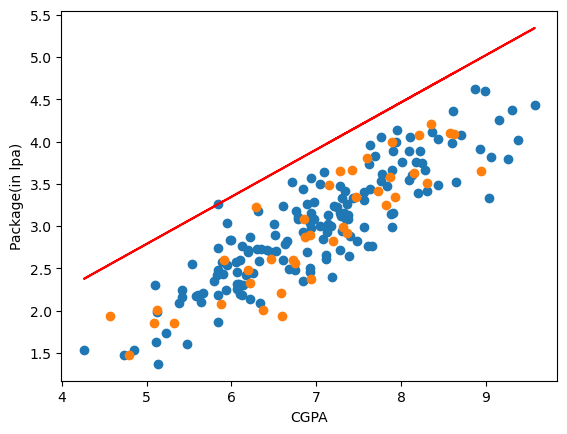

In [66]:
plt.scatter(x_train,y_train)
plt.scatter(x_test,y_test)

plt.plot(x_train,(m*x_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')